In [1]:
%matplotlib inline
from config_calc import *

import matplotlib
import matplotlib.pyplot as plt
from cartopy.util import add_cyclic_point
import matplotlib.gridspec as gridspec
plt.rcParams['mathtext.default']='regular'

import cmocean
import colorbrewer
import plot_tools
import proc_cesm_le

In [2]:
%%time
varlist = ['O2','AOU','IAGE','OUR','O2_CONSUMPTION']
tr85 = proc_cesm_le.open_ens('tr85','ann_dft_aavg',varlist)
tr45 = proc_cesm_le.open_ens('tr85','ann_dft_aavg',varlist)

v = 'O2sat'
tr85[v] = tr85.AOU + tr85.O2
tr45[v] = tr45.AOU + tr45.O2
varlist.append(v)  

tr85 = tr85.drop(['TLAT','TLONG','TAREA','KMT','ULAT','ULONG','UAREA'])
print tr85

<xarray.Dataset>
Dimensions:         (ens: 33, time: 182, z_t: 60, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t             (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 4.5e+03 ...
  * z_t_150m        (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 ...
  * z_w             (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 ...
Dimensions without coordinates: ens, time
Data variables:
    O2              (ens, time, z_t) float64 250.0 250.0 250.1 249.7 248.8 ...
    AOU             (ens, time, z_t) float64 1.188 1.304 1.738 2.73 5.086 ...
    IAGE            (ens, time, z_t) float64 0.0 0.06972 0.2232 0.6768 1.465 ...
    OUR             (ens, time, z_t) float64 0.0 1.968 2.087 2.512 3.324 ...
    O2_CONSUMPTION  (ens, time, z_t) float64 5.009e-06 5.06e-06 5.201e-06 ...
    dz              (z_t) float64 1e+03 1e+03 1e+03 1e+03 1e+03 1e+03 1e+03 ...
    year            (time) float64 1.92e+03 nan 1.921e+03 1.922e+03 ...
    vol_sum         (z_t) float64 3.611e+21 3.611e+21 3.611e+21 

### compute ensemble mean

In [3]:
%%time
tr85a = tr85.mean(dim='ens')
tr45a = tr45.mean(dim='ens')
print tr85a

<xarray.Dataset>
Dimensions:         (time: 182, z_t: 60, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t             (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 4.5e+03 ...
  * z_t_150m        (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 ...
  * z_w             (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 ...
Dimensions without coordinates: time
Data variables:
    O2              (time, z_t) float64 250.0 250.0 250.1 249.7 248.8 246.6 ...
    AOU             (time, z_t) float64 1.188 1.304 1.738 2.73 5.086 9.231 ...
    IAGE            (time, z_t) float64 0.0 0.06972 0.2232 0.6768 1.465 ...
    OUR             (time, z_t) float64 0.0 1.968 2.087 2.512 3.324 3.616 ...
    O2_CONSUMPTION  (time, z_t) float64 5.009e-06 5.06e-06 5.201e-06 ...
    dz              (z_t) float64 1e+03 1e+03 1e+03 1e+03 1e+03 1e+03 1e+03 ...
    year            (time) float64 1.92e+03 nan 1.921e+03 1.922e+03 ...
    vol_sum         (z_t) float64 3.611e+21 3.611e+21 3.611e+21 3.554e+21 ...
    O2s

In [4]:
%%time
tr85a = tr85a.compute()
tr45a = tr45a.compute()

CPU times: user 3.34 s, sys: 749 ms, total: 4.08 s
Wall time: 9.39 s


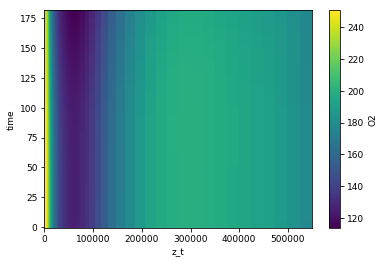

In [5]:
tr85a.O2.plot()

In [6]:
tr85a['OUR_est'] = tr85a.AOU / tr85a.IAGE.where(tr85a.IAGE>0.)

In [7]:
baseline = tr85a.isel(time=slice(0,20)).mean(dim='time')
baseline

<xarray.Dataset>
Dimensions:         (z_t: 60, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t             (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 4.5e+03 ...
  * z_t_150m        (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 ...
  * z_w             (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 ...
Data variables:
    O2              (z_t) float64 250.2 250.2 250.3 249.9 249.1 246.9 242.9 ...
    AOU             (z_t) float64 1.216 1.347 1.797 2.728 4.995 9.032 14.99 ...
    IAGE            (z_t) float64 0.0 0.07097 0.2189 0.6558 1.416 2.505 ...
    OUR             (z_t) float64 0.0 1.967 2.095 2.47 3.247 3.601 4.84 ...
    O2_CONSUMPTION  (z_t) float64 5.013e-06 5.065e-06 5.211e-06 4.945e-06 ...
    dz              (z_t) float64 1e+03 1e+03 1e+03 1e+03 1e+03 1e+03 1e+03 ...
    year            float64 1.929e+03
    vol_sum         (z_t) float64 3.611e+21 3.611e+21 3.611e+21 3.554e+21 ...
    O2sat           (z_t) float64 251.4 251.5 252.1 252.7 254.1 255.9 257.9 ...
    O

In [8]:
delta = tr85a - baseline
delta['z_t'] = tr85a.z_t
delta

<xarray.Dataset>
Dimensions:         (time: 182, z_t: 60, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t             (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 4.5e+03 ...
  * z_t_150m        (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 ...
  * z_w             (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 ...
Dimensions without coordinates: time
Data variables:
    O2              (time, z_t) float64 -0.1476 -0.1346 -0.1358 -0.2203 ...
    AOU             (time, z_t) float64 -0.02811 -0.04303 -0.05814 0.001833 ...
    IAGE            (time, z_t) float64 0.0 -0.001243 0.004291 0.02105 ...
    OUR             (time, z_t) float64 0.0 0.001111 -0.007446 0.0417 ...
    O2_CONSUMPTION  (time, z_t) float64 -4.469e-09 -4.639e-09 -9.96e-09 ...
    dz              (z_t) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    year            (time) float64 -9.0 nan -8.0 -7.0 -6.0 -5.0 -4.0 -3.0 ...
    vol_sum         (z_t) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    O2sa

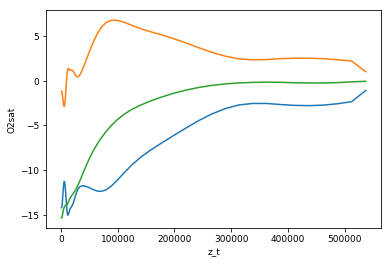

In [9]:
delta.O2[-1,:].plot(); delta.AOU[-1,:].plot(); delta.O2sat[-1,:].plot()

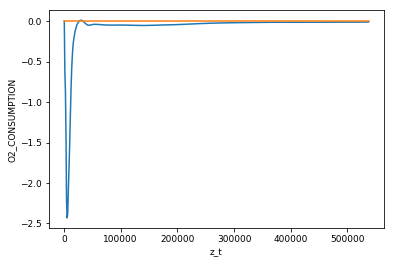

In [10]:
delta.OUR[-1,:].plot(); delta.O2_CONSUMPTION[-1,:].plot()

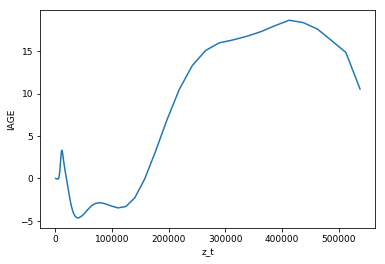

In [11]:
delta.IAGE[-1,:].plot()

In [12]:
delta['AOU_flow'] = delta.IAGE*baseline.OUR_est 
delta['AOU_our'] = delta.OUR_est*baseline.IAGE
delta['AOU_est'] = delta.AOU_flow + delta.AOU_our 
delta

<xarray.Dataset>
Dimensions:         (time: 182, z_t: 60, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t             (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 4.5e+03 ...
  * z_t_150m        (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 ...
  * z_w             (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 ...
Dimensions without coordinates: time
Data variables:
    O2              (time, z_t) float64 -0.1476 -0.1346 -0.1358 -0.2203 ...
    AOU             (time, z_t) float64 -0.02811 -0.04303 -0.05814 0.001833 ...
    IAGE            (time, z_t) float64 0.0 -0.001243 0.004291 0.02105 ...
    OUR             (time, z_t) float64 0.0 0.001111 -0.007446 0.0417 ...
    O2_CONSUMPTION  (time, z_t) float64 -4.469e-09 -4.639e-09 -9.96e-09 ...
    dz              (z_t) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    year            (time) float64 -9.0 nan -8.0 -7.0 -6.0 -5.0 -4.0 -3.0 ...
    vol_sum         (z_t) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    O2sa

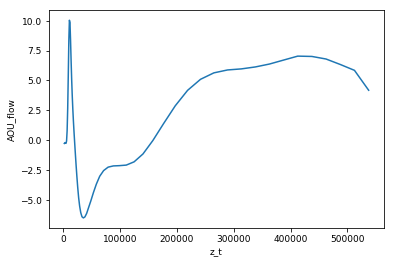

In [13]:
delta.AOU_flow[-1,:].plot(); 

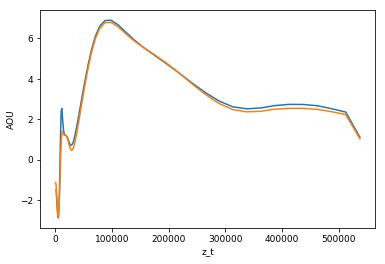

In [14]:
delta.AOU_est[-1,:].plot(); delta.AOU[-1,:].plot()

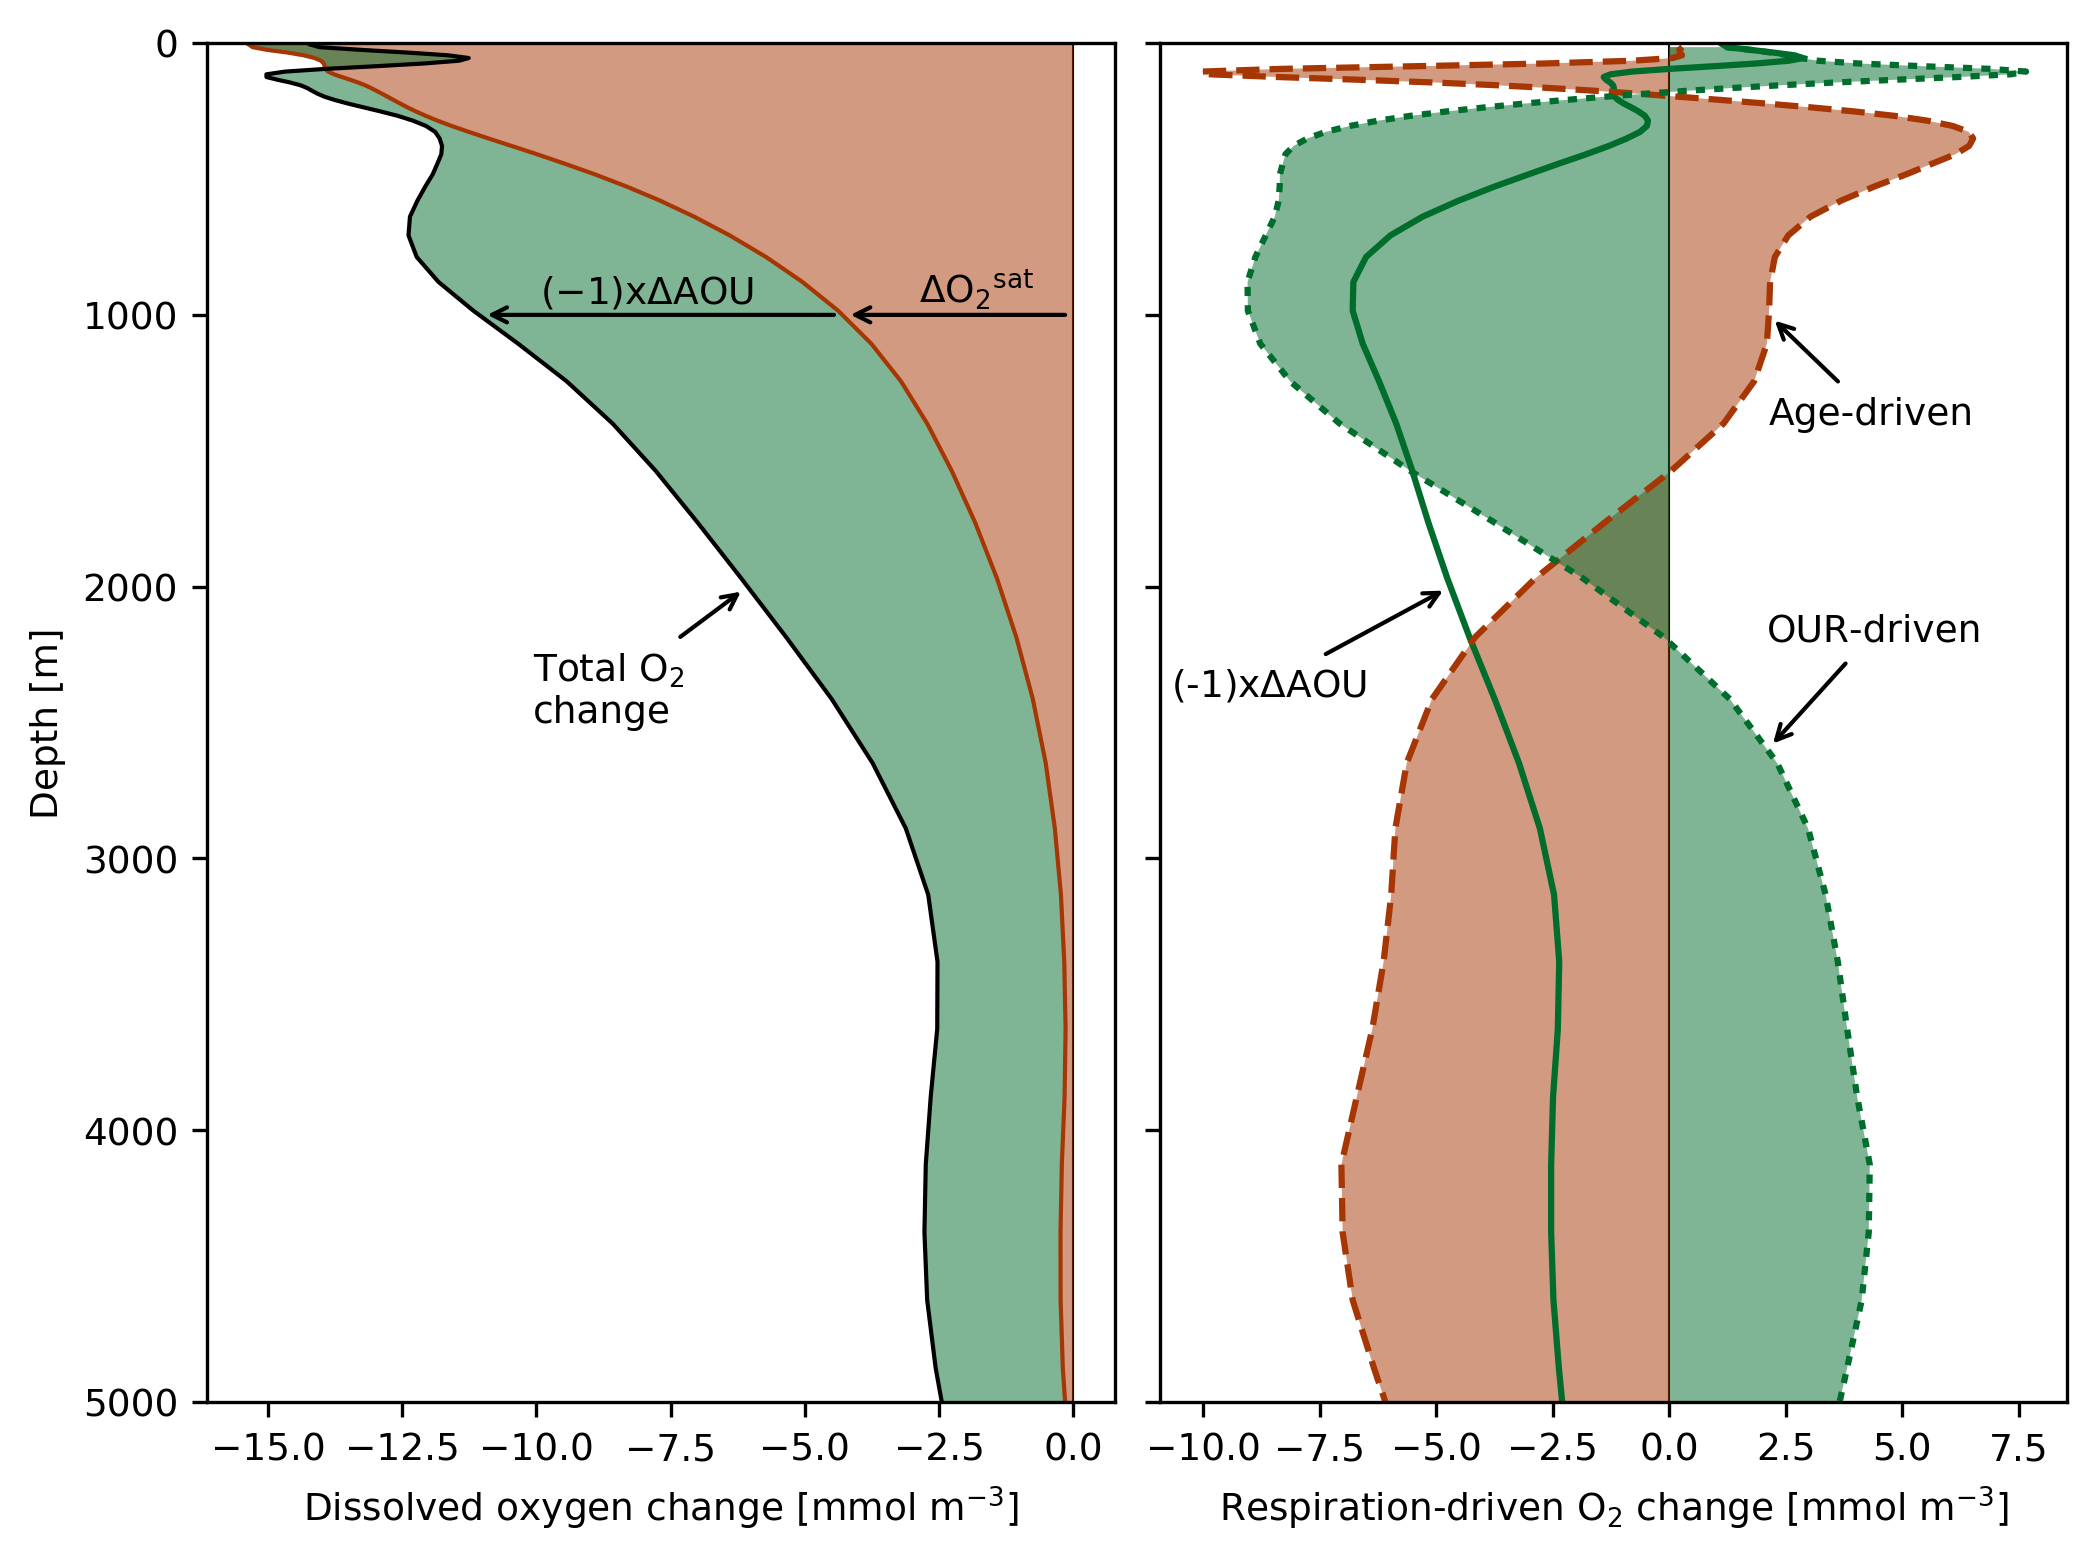

In [15]:
plot_name = os.path.join(diro['fig'],'cesm_o2_change_profile.pdf')

fig = plt.figure(dpi=300,figsize=(8,6),facecolor='w')
gs = gridspec.GridSpec(1,2)


clr_sat = colorbrewer.singlehue('orange')[1]
clr_aou = colorbrewer.singlehue('green')[1]

ax = fig.add_subplot(gs[0,0])
#p = ax.plot(-delta.AOU[-1,:],delta.z_t*1e-2,label='Respiration-driven')
x2 = delta.O2[-1,:]
x1 = delta.O2sat[-1,:] #
y = delta.z_t*1e-2 #delta.O2[-1,:]

ax.plot(x1,y,color=clr_sat,label='Solubility-driven',linewidth=1.)
ax.plot(x2,y,color='black',label='Total O$_2$ change',linewidth=1.)
ax.fill_betweenx(y,x1,0., facecolor=clr_sat, alpha=0.5)
ax.fill_betweenx(y,x1,x2,facecolor=clr_aou, alpha=0.5)


yl = 1000
xl1 = np.interp(yl,y,x1)
xlm = xl1/2.+xl1/6.
ax.annotate('', 
            xy=(xl1,yl),
            xytext=(0,yl),
            arrowprops=dict(facecolor=clr_sat,arrowstyle='->'))
ax.annotate('$\Delta$O${_{2}}^{sat}$', xy=(xlm,yl), xytext=(xlm,yl-45.))

xl2 = np.interp(yl,y,x2)
xlm = (xl2-xl1)/2. + xl1 + (xl2-xl1)/3.

ax.annotate('', 
            xy=(xl2,yl),
            xytext=(xl1,yl),
            arrowprops=dict(facecolor=clr_sat,arrowstyle='->'))
ax.annotate('$(-1)x\Delta$AOU', xy=(xlm,yl), xytext=(xlm,yl-45.))

yl = 2000
xl3 = np.interp(yl,y,x2)
xlm = (xl2-xl1)/2. + xl1 - (xl2-xl1)

ax.annotate('Total O$_2$\nchange', 
            xy=(xl3,yl),
            xytext=(xl3-4,yl+500),
            arrowprops=dict(facecolor=clr_sat,arrowstyle='->'))

ax.axvline(x=0,linewidth=0.5,color='k',zorder=-10)

ax.set_ylim((5000,0))

ax.set_ylabel('Depth [m]')
ax.set_xlabel('Dissolved oxygen change [mmol m$^{-3}$]')


ax = fig.add_subplot(gs[0,1])

ynew = np.arange(0,5000.5,0.5)
x1 = np.interp(ynew,y,-delta.AOU[-1,:])
x2 = np.interp(ynew,y,-delta.AOU_flow[-1,:])
x3 = np.interp(ynew,y,-delta.AOU_our[-1,:])

ax.fill_betweenx(ynew,x2,0,facecolor=clr_sat, alpha=0.5)#, where=((x2<=x1) & (x1<=x3)) | ((x3<=x1) & (x1<=x2)))
ax.fill_betweenx(ynew,x3,0,facecolor=clr_aou, alpha=0.5)#, where=((x2<=x1) & (x1<=x3)) | ((x3<=x1) & (x1<=x2)))

ax.plot(-delta.AOU[-1,:],delta.z_t*1e-2,label='(-1)x$\Delta$AOU',
        color=clr_aou,
        linestyle='-')


ax.plot(-delta.AOU_flow[-1,:],delta.z_t*1e-2,label='Circulation-driven',
        color=clr_sat,
        linestyle='--')

ax.plot(-delta.AOU_our[-1,:],delta.z_t*1e-2,label='OUR-driven',
        color=clr_aou,
        linestyle=':')


yl = 2000
xl = np.interp(yl,ynew,x1)

ax.annotate('(-1)x$\Delta$AOU', 
            xy=(xl,yl),
            xytext=(xl-6,yl+400),
            arrowprops=dict(facecolor=clr_sat,arrowstyle='->'))

yl = 2600
xl = np.interp(yl,ynew,x3)
ax.annotate('OUR-driven', 
            xy=(xl,yl),
            xytext=(xl,yl-400),
            arrowprops=dict(facecolor=clr_sat,arrowstyle='->'))

yl = 1000
xl = np.interp(yl,ynew,x2)
ax.annotate('Age-driven', 
            xy=(xl,yl),
            xytext=(xl,yl+400),
            arrowprops=dict(facecolor=clr_sat,arrowstyle='->'))

ax.set_ylim((5000,0))

ax.axvline(x=0,linewidth=0.5,color='k',zorder=-10)

ax.set_xlabel('Respiration-driven O$_2$ change [mmol m$^{-3}$]')
ax.set_yticklabels('')

gs.update(wspace=0.05)

plt.savefig(plot_name,bbox_inches='tight')